In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('..') # add the root folder to the path

from diffusion_model import Scheduler, Forwarder, Backwarder, Model, get_mnist_dataset, device

import torch
import matplotlib.pyplot as plt
import matplotlib
from einops import rearrange
import numpy as np

FIG_SIZE = 4
matplotlib.rcParams['figure.figsize'] = (FIG_SIZE, FIG_SIZE)

print(f"Using device: {device}")

Using device: cpu


# Plot helper functions

In [3]:
def many_imshow(xs, y_title=None, title=None):
    fig, axes = plt.subplots(1, len(xs), figsize=(FIG_SIZE*len(xs), FIG_SIZE))
    if title is not None:
        fig.suptitle(title)
    if y_title is not None:
        axes[0].set_ylabel(y_title)
    for i, ax in enumerate(axes):
        progress = i / (len(xs)-1)
        ax.imshow(xs[i].cpu(), cmap='gray')
        ax.set_title(f"t={progress*100:.0f}%")
    plt.show()

In [5]:
images = np.load('../images_model5.npy')
images.shape

(1024, 28, 28)

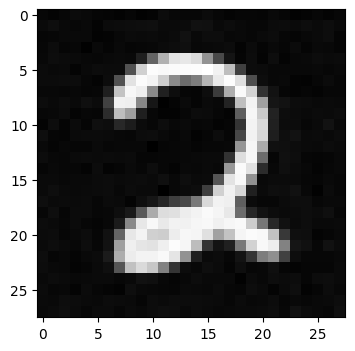

In [6]:
_, axes = plt.subplots(32, 32, figsize=(FIG_SIZE*32, FIG_SIZE*32))

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.axis('off')
        ax.imshow(images[i, j], cmap='gray')